In [34]:
import numpy as np
import matplotlib.pyplot as plt
gamma = 7/5
AM = np.array([[0,1,0,0],[0,0,0,1],[0,0,0,0],[0,7/5,0,0]])
B = np.array([[0,0,1,0],[0,0,0,0],[0,0,0,1],[0,0,7/5,0]])
l, v = np.linalg.eig(AM)
A = np.diag(l)
U = v
U_ = np.linalg.inv(U)
Ap = np.where(A>0, A, 0)
An = np.where(A<0, A, 0)
Ap = U.dot(Ap).dot(U_)
An = U.dot(An).dot(U_)
lb, vb = np.linalg.eig(B)
Sigma = np.diag(lb)
S = vb
S_ = np.linalg.inv(S)
Bp = np.where(Sigma > 0, Sigma, 0)
Bn = np.where(Sigma < 0, Sigma, 0)
Bp = S.dot(Bp).dot(S_)
Bn = S.dot(Bn).dot(S_)
def Numerical_Solution(x0, y0, r, t_final, dt = 0.00005):
    Nx = 200
    Ny = 200
    dx = 1/Nx
    dy = 1/Ny
    S0 = np.zeros((4,Nx+2, Ny+2))
    x = np.linspace(0 + dx, 1 - dx, Nx)
    y = np.linspace(0 + dx, 1 - dx, Ny)
    x = np.insert(x,0,0)
    y = np.insert(y,0,0)
    x = np.append(x,1)
    y = np.append(y,1)
    X, Y = np.meshgrid(x, y)
    cont = (((X - x0)**2+(Y - y0)**2)<= r**2)
    S0[0,cont] = 1
    S0[-1,cont] = 1
    dt = 0.00005
    if t_final == 0.0:
        return S0
    else:
        for i,t in enumerate(np.arange(0, t_final+dt, dt)):
            NewS0 = np.zeros((4,Nx+2, Ny+2))
            S0_f_x = S0[:,1:-1,1:-1].reshape(4,-1)
            S0_b_x = S0[:,2:,1:-1].reshape(4,-1)
            S0_m_x = S0[:,0:-2,1:-1].reshape(4,-1)

            F1 = Ap.dot(S0_b_x)+An.dot(S0_f_x)
            F2 = Ap.dot(S0_m_x)+An.dot(S0_f_x)
            F1 = F1.reshape(4, Nx, Nx)
            F2 = F2.reshape(4, Nx, Nx)

            S0_f_y = S0[:,1:-1,1:-1].reshape(4,-1)
            S0_b_y = S0[:,1:-1,2:].reshape(4,-1)
            S0_m_y = S0[:,1:-1,0:-2].reshape(4,-1)

            G1 = Bp.dot(S0_b_y)+Bn.dot(S0_f_y)
            G2 = Bp.dot(S0_m_y)+Bn.dot(S0_f_y)

            G1 = G1.reshape(4, Nx,Nx)
            G2 = G2.reshape(4, Nx,Nx)
            NewS0[:,1:-1,1:-1] = S0[:,1:-1,1:-1] - dt/dx*(F1 - F2) - dt/dy*(G1 - G2)
            S0 = NewS0

        return S0

In [30]:
S0_t01 = Numerical_Solution(1/3,1/3,1/5,0.1) #t=0.1

Text(0.5, 1.0, '$\\tilde{p}$')

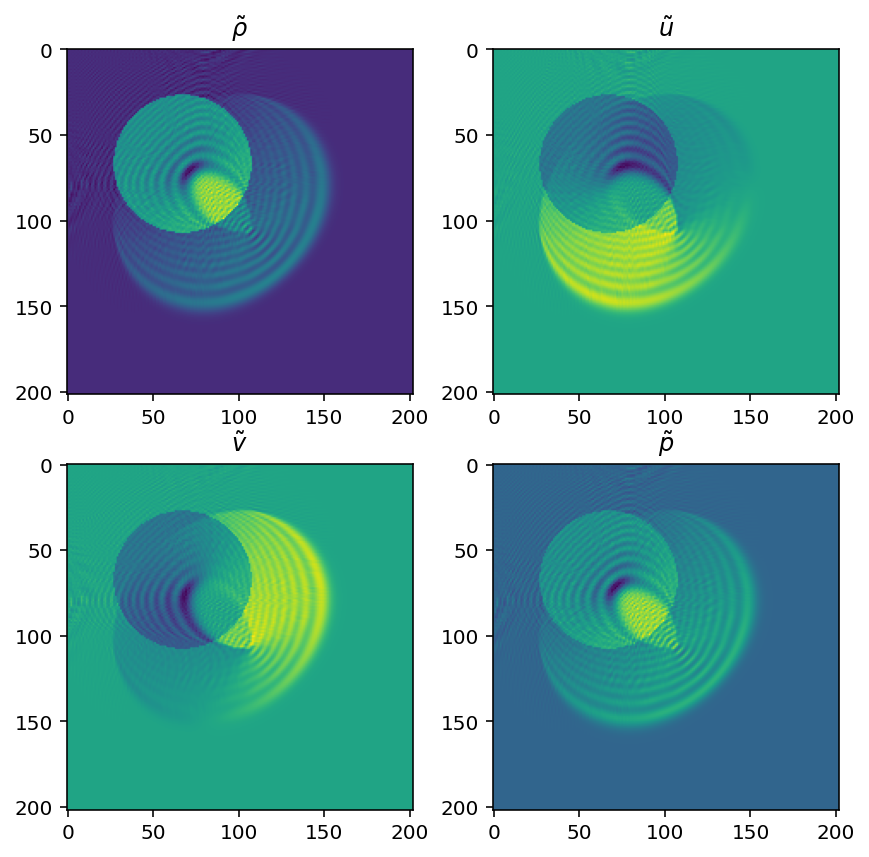

In [31]:
%config InlineBackend.figure_format = 'retina'
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(221)
ax.imshow(S0_t01[0,:,:], label = 'R')
ax.set_title('$\\tilde{\\rho}$')
ax = fig.add_subplot(222)
ax.imshow(S0_t01[1,:,:])
ax.set_title('$\\tilde{u}$')
ax = fig.add_subplot(223)
ax.imshow(S0_t01[2,:,:])
ax.set_title('$\\tilde{v}$')
ax = fig.add_subplot(224)
ax.imshow(S0_t01[3,:,:])
ax.set_title('$\\tilde{p}$')

In [26]:
S0_t02 = Numerical_Solution(1/3,1/3,1/5,0.2)

Text(0.5, 1.0, '$\\tilde{p}$')

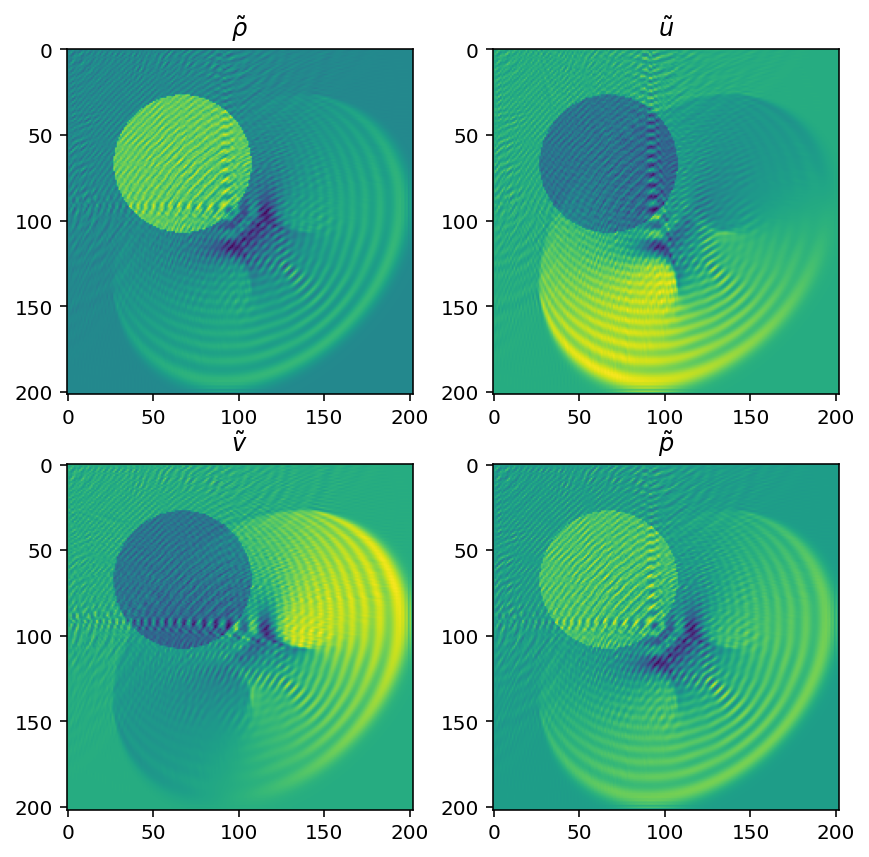

In [32]:
%config InlineBackend.figure_format = 'retina'
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(221)
ax.imshow(S0_t02[0,:,:], label = 'R')
ax.set_title('$\\tilde{\\rho}$')
ax = fig.add_subplot(222)
ax.imshow(S0_t02[1,:,:])
ax.set_title('$\\tilde{u}$')
ax = fig.add_subplot(223)
ax.imshow(S0_t02[2,:,:])
ax.set_title('$\\tilde{v}$')
ax = fig.add_subplot(224)
ax.imshow(S0_t02[3,:,:])
ax.set_title('$\\tilde{p}$')

Text(0.5, 1.0, '$\\tilde{p}$')

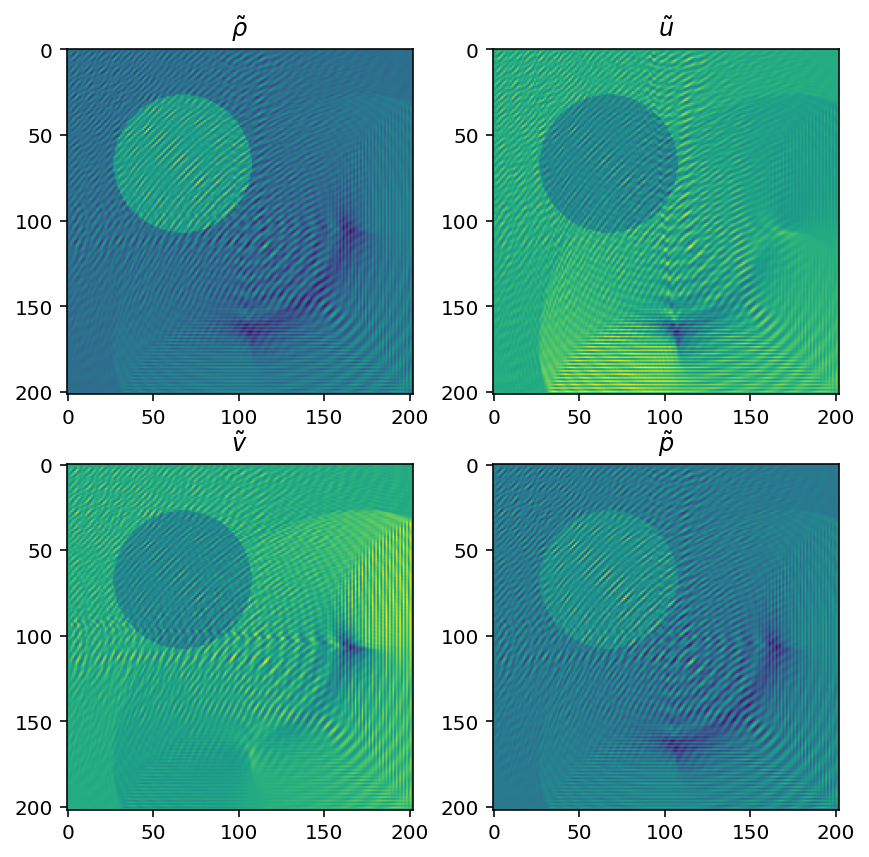

In [28]:
S0_t03 = Numerical_Solution(1/3,1/3,1/5,0.3)
%config InlineBackend.figure_format = 'retina'
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(221)
ax.imshow(S0_t03[0,:,:], label = 'R')
ax.set_title('$\\tilde{\\rho}$')
ax = fig.add_subplot(222)
ax.imshow(S0_t03[1,:,:])
ax.set_title('$\\tilde{u}$')
ax = fig.add_subplot(223)
ax.imshow(S0_t03[2,:,:])
ax.set_title('$\\tilde{v}$')
ax = fig.add_subplot(224)
ax.imshow(S0_t03[3,:,:])
ax.set_title('$\\tilde{p}$')

Text(0.5, 1.0, '$\\tilde{p}$')

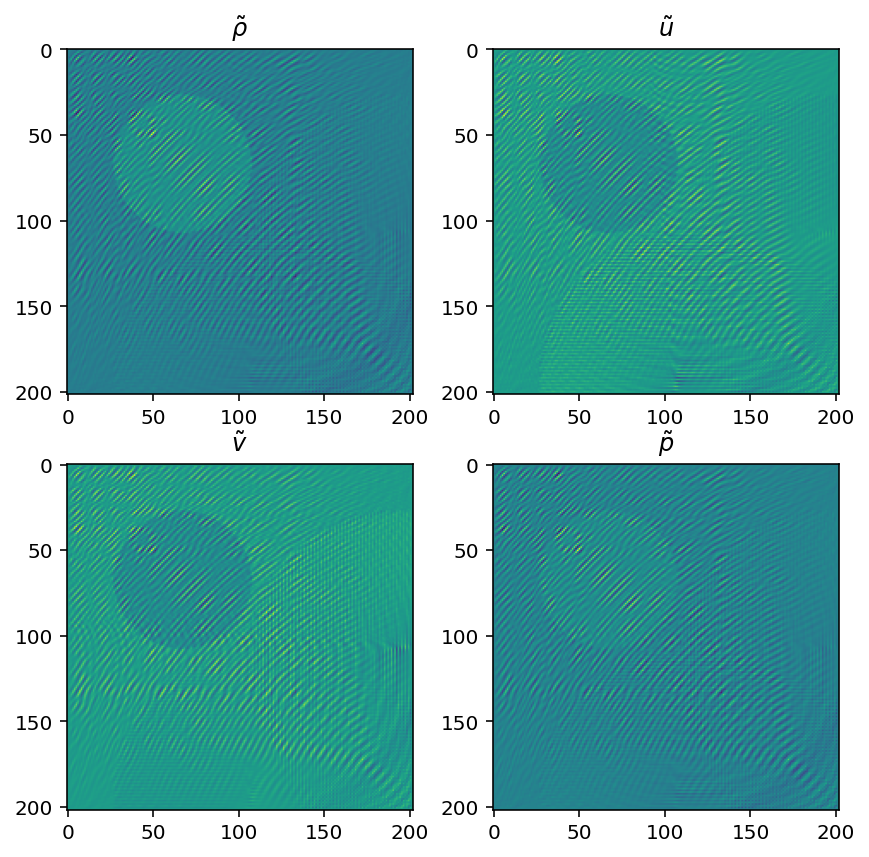

In [29]:
S0_t04 = Numerical_Solution(1/3,1/3,1/5,7/5,0.4)
%config InlineBackend.figure_format = 'retina'
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(221)
ax.imshow(S0_t04[0,:,:], label = 'R')
ax.set_title('$\\tilde{\\rho}$')
ax = fig.add_subplot(222)
ax.imshow(S0_t04[1,:,:])
ax.set_title('$\\tilde{u}$')
ax = fig.add_subplot(223)
ax.imshow(S0_t04[2,:,:])
ax.set_title('$\\tilde{v}$')
ax = fig.add_subplot(224)
ax.imshow(S0_t04[3,:,:])
ax.set_title('$\\tilde{p}$')

Text(0.5, 1.0, '$\\tilde{p}$')

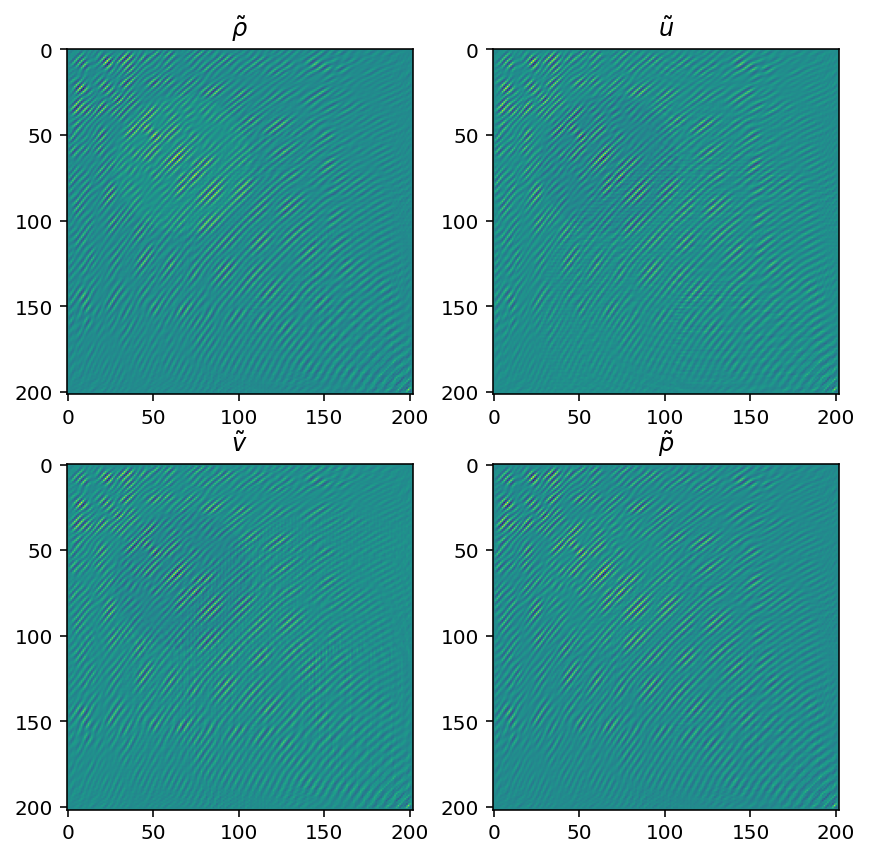

In [35]:
S0_t05 = Numerical_Solution(1/3,1/3,1/5,0.5)
%config InlineBackend.figure_format = 'retina'
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(221)
ax.imshow(S0_t05[0,:,:], label = 'R')
ax.set_title('$\\tilde{\\rho}$')
ax = fig.add_subplot(222)
ax.imshow(S0_t05[1,:,:])
ax.set_title('$\\tilde{u}$')
ax = fig.add_subplot(223)
ax.imshow(S0_t05[2,:,:])
ax.set_title('$\\tilde{v}$')
ax = fig.add_subplot(224)
ax.imshow(S0_t05[3,:,:])
ax.set_title('$\\tilde{p}$')